[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorial_notebooks/5_data_prep_tasks.ipynb) 

# Tutorial 5 - Pandas library for data preparation
The notebook revisits our lecture on EDA and data preparation. In this scope, you will further deepen your understanding of **Pandas**, the goto library for working with tabular data in Python. We will exemplify two core Pandas classes *data series* and *data frame*. To that end, the demo notebook introduces a real-world data associated with credit scoring. 

Here is the outline for today:
- The HMEQ data set
- The Pandas library
- Explanatory data analysis
- Data preparation

Before moving on, let's import some of our standard library so that we have them ready when we need them.

In [44]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# This code will suppress warning message  
import warnings
warnings.filterwarnings("ignore")


## The HMEQ data set
Our data set, called the  "Home Equity" or, in brief, HMEQ data set, is provided by [Credit Risk Analytics.Net](http://www.creditriskanalytics.net). It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called 'BAD' is  provided and indicates whether a borrower has repaid her/his debt. You can think of the data as a standard use case of binary classification. Specifically, the data set consists of 5,960 observations and 13 features including a binary target variable. The variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

The features describe the financial situation of a borrower. We will keep using the data set for many tutorials and tasks. So it makes sense to familiarize yourself with the features. Make sure you understand what type of information they provide and what this information might reveal about the risk of defaulting.  

---

# Foundations of the Pandas Library
Pandas is a key library within in the Python ecosystem. Given time restrictions, our tutorial will not provide a comprehensive introduction. Below, we provide a few useful demos for self-study. The core of this tutorial session focuses on use cases concerning explanatory data analysis and data preparation. 

## Loading data from the WWW
The `Pandas` library supports various ways to load data from, e.g., your hard disk, a server in your network, the internet, and so on. Here, we consider the easiest setting, which is loading data from the web. All we need for this is an URL. The following code loads the data directly from the [BADS repository](https://github.com/Humboldt-WI/bads).

In [2]:
import pandas as pd  # import library

# Load the data directly from GitHub
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq.csv'
df = pd.read_csv(data_url)


## Eyeballing data 
The Pandas data frame provides a ton of useful functions for data handling. We begin with showcasing some standard functions that one needs every time when working with data. 

The first step is typically to preview the data. The `head` function displays the first rows of the data frame. By default, it shows five rows. You can also specify how many rows you want to see. Similar functions are `tail`, which shows the last rows of the data frame.

```python
# Get a preview of the data
df.head(10)  # print ten rows 
# Alternatively 
df.tail(10)  # print last ten rows
# You can also simply print the entire data frame
print(df)
```

In [ ]:
# Preview the data


Another key property, for Pandas data frames and other data structures, is their shape. The shape indicates how many rows and columns the data frame has. This is useful to check whether the data has been loaded correctly. Recall that, in a machine learning, we refer to these as *observations* (rows) and *features* (columns).      

```python   
# Get the shape of the data frame
df.shape  # returns (5960, 14)
```
Below, we illustrate some ways to use the `.shape` attribute. 



In [7]:
# Query some properties of the data
print(f'Dimensionality of the data is {df.shape}')  # .shape returns a tupel
print(f'The data set has {df.shape[0]} observations and {df.shape[1]} features')     # .shape returns a tupel, which we can index
print(f'The total number of elements is {df.size}.')

Dimensionality of the data is (5960, 13)
The data set has 5960 observations and 13 features
The total number of elements is 77480.


The `.info()` function provides a more technical summary of the data frame. It shows the number of non-null entries per column, the data type of each column, and the memory usage of the data frame. This is particularly useful to get a quick overview of the data structure and to identify any missing values.

```python  
# Get a technical summary of the data frame
df.info()
```

In [8]:
# Try out the .info() method


Finally, eyeballing the data in a machine learning context involves examining key descriptive statistics. To compute these, we can use the `.describe()` method. By default, it computes statistics for all numerical features. If you want to include categorical features, you can set the `include` parameter to `'all'`.

```python   
# Get descriptive statistics
df.describe()  # for numerical features
# Alternatively, include all features
df.describe(include='all')  # for all features
```

In [9]:
# Produce summary statistics (to R-programmers: this is equivalent to the famous R function summary())


## Navigating data (self-study)
We discussed indexing and slicing in the contexts of Python `lists` and other containers like dictionaries. In `Pandas`, `Numpy`, and other libraries, indexing/slicing are equally important and work in similar ways. Here, we provide a few more demos on common ways to use indexing in `Pandas`. A web search for "pandas data frame indexing" will provide many additional insights if you are interested. Likewise, feel free to skip this part if you already feel comfortable with data frame indexing.

### Basic indexing of rows and columns

In [7]:
# Accessing a single column by name
df['BAD']
# Alternatively, you can access a single column using dot-notation
df.BAD

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

For the *R* programmers: we can index our data in a way similar to *R*. Note the use of `loc[]`. This is a special type of syntax you need to memorize. Also note that we specify the columns we want to index using a `list`. Hence the inner box bracket.

In [8]:
# R-style indexing of selected rows and columns
df.loc[0:4, ["BAD", "LOAN"]]  # select row 0, 1, 2, 3 and for those rows only the columns BAD and LOAN

,BAD,LOAN
0,1,1100
1,1,1300
2,1,1500
3,1,1500
4,0,1700


In [9]:
# Access columns by a numerical index using .iloc
df.iloc[0:4, 0]
df.iloc[0:4, [0, 3, 5]]
df.iloc[0:4, np.arange(4)]

,BAD,LOAN,MORTDUE,VALUE
0,1,1100,25860.0,39025.0
1,1,1300,70053.0,68400.0
2,1,1500,13500.0,16700.0
3,1,1500,NaN,NaN


A few cautionary notes on numerical indexing in Python. The function `iloc()` considers the index of the data frame. In the above output, this is the left-most column without header. We have not defined a custom row index and Python uses consecutive integer numbers by default. However, a data frame could also have a custom index. In such a case, calls to `iloc()` need to refer to the custom index. It is good practice to eyeball a data frame and verify the way in which rows are indexed prior to using `iloc()`.
<br>

### Other common forms of indexing and subset selection
It is also common practice to select rows based on comparisons of feature values using. You can achieve this using `.loc`. Here are a few examples:

In [10]:
df.loc[df.BAD == 1, :]  # Get all observations with target variable BAD = 1. The : means you want to retrieve all columns 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN
5931,1,75400,NaN,89609.0,DebtCon,Other,1.0,0.0,0.0,115.763534,9.0,23.0,41.105569
5932,1,76500,38206.0,90000.0,DebtCon,Other,12.0,0.0,0.0,134.900000,0.0,26.0,NaN
5933,1,77200,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,NaN


In [11]:
df.loc[df["NINQ"]>12, ["LOAN", "VALUE", "NINQ"]]  # Another example where we select only a subset of the columns

,LOAN,VALUE,NINQ
44,3000,14500.0,14.0
2593,15000,26100.0,17.0
3661,19300,135000.0,13.0
4014,21000,136249.0,13.0


When working with high-dimensional data sets, you will often perform certain actions only with columns or a specific data type. To that end, you should know the function `select_dtypes`. This function works with data types as they are defined in Pandas. Here are a few examples, which make use of the function arguments `include` and `exclude` to specify which columns we want to access:
```python
# Select all numerical features 
num_df = df.select_dtypes(include=['number'])
# Select all categorical features
cat_df = df.select_dtypes(include=['object'])
# Select all features that are not numerical
non_num_df = df.select_dtypes(exclude=['number'])
# Select all numerical and boolean features
num_bool_df = df.select_dtypes(include=['number', 'bool'])
``` 

Recall that the function `.info()` provides information about the data types of each feature. This is useful to identify the correct data types to be used with `select_dtypes`.

It is also worth mentioning that `.select_dtypes` returns a data frame. Hence, you can further process the returned data frame using all standard data frame functions. However, be careful when making changes to the returned data frame. These changes will not be reflected in the original data frame. If you want to make changes and in several other use cases, it is convenient to not create a copy of selected columns of a data frame, but to index the original data frame directly. To achieve this, you need to combine `.select_dtypes` with indexing. Here is an example:
```python   
# Select all numerical features from the original data frame and return an index
ix_num_df = df.select_dtypes(include=['number']).columns
# Use the index to access the original data frame
num_df_original = df[ix_num_df]
```



In [ ]:
# Try out the above examples to create different views of the data frame. For example, try to access only the columns that store whole numbers (i.e., integer)



## Manipulating data (self-study)
We often have to manipulate data. For example, imputing missing values as part of data preparation (see later) will require us to change the data stored in a data frame. `Pandas` supports many ways to manipulate data. Let's introduce a few common options. 

### Using in-build Pandas functions
Many functions that `Pandas`provide result in data changes. One example is the `sort_values` function, which we demonstrate below. By default, functions like `sort_values` **do not alter the data** in a `DataFrame` directly. Instead, they return a new `DataFrame` in which the data was changed, just as the `.select_dtypes` function discussed above. Here is an example. 


In [12]:
df_sorted = df.sort_values(by="LOAN", ascending=False)  # We can specify the column by which to sort and the order; next to other arguments
df_sorted.head(10)  # Print a preview of the data; like above when introducing the method .head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5954,0,88900,48919.0,93371.0,DebtCon,Other,15.0,0.0,1.0,205.650159,0.0,15.0,34.818262
5953,0,88800,53307.0,94058.0,DebtCon,Other,16.0,0.0,0.0,218.304978,0.0,15.0,34.242465
5952,0,88500,50240.0,94687.0,DebtCon,Other,16.0,0.0,0.0,214.426206,0.0,16.0,34.751158
5951,0,88300,54004.0,94838.0,DebtCon,Other,16.0,0.0,0.0,193.702051,0.0,15.0,36.262691
5950,0,87500,55938.0,86794.0,DebtCon,Other,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653


Note the row index (left-most column). The index tells us that the order of the rows is different. That was to be expected because we sorted the the feature *LOAN*. In the original data, which we store in the variable `df`, we still have the original row order.

In [14]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


The point of the demo was to show that, by default, `Pandas` function will not alter the `DataFrame` directly. Therefore, you see many codes of this form: 
```
new_data_frame = old_data_frame.someFunction()
``` 
Occasionally, you can overwrite this default behavior. Some `Pandas` functions provide an argument `inplace`. Setting this argument to `True` would then alter a `Data Frame` directly. To try this out, you can run the following code: 
```python
# Create a copy of the original data frame to preserve it
df_copy = df.copy()
# Print the first rows of the copied data frame
print(df_copy.head())  # This is only to show the original row order
# Sort the copied data frame in place
df_copy.sort_values(by='VALUE', inplace=True)
# Print the first rows of the sorted data frame again and verify the order has changed
print(df_copy.head())  # The order should now be different
```


In [21]:
# Experiment with the inplace argument. We recommend you first create a copy of the original data frame to avoid changing it. 
df_copy = df.copy()
# Now play with df_copy


### The apply function
If you have used R, you will know the `apply()` function. It kinda does what the name suggests. It let's you define a function and apply that function to every element in a data frame. Combine that with indexing and you obtain a powerful way to selectively alter your data. 
<br>
We provide some demos in the following, where, for simplicity, we consider only the numerical features. 

In [16]:
df_numerical = df.select_dtypes(float) 

Silly example: say you want to square the values of all your features. You can achieve this by calling `.apply()` on a `DataFrame` providing a suitable function as argument. In this - silly - example, we can use the in-built `Numpy` function `square`. However, we could also use a custom function, or define the function directly within the call to `.apply`. The latter is a more advanced Python concept known as *lambda function*. Websearch for it if interested.

In [17]:
# All three examples below are equivalent

# Using apply together with an existing function
df_squared = df_numerical.apply(np.square)  # note that the reference the function. Thus it is np.square and not np.square(). When adding brackets, we call the function. 

# Using apply together with a custom function
def my_square(x):
    return x*x

df_squared = df_numerical.apply(my_square)

# Using apply together with a lamda function
df_squared = df_numerical.apply(lambda x: x * x) # you can define a function directly like here, we have a square function

df_squared.head(10)

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,6.687396e+08,1.522951e+09,110.25,0.0,0.0,8905.067778,1.0,81.0,NaN
1,4.907423e+09,4.678560e+09,49.00,0.0,4.0,14843.361110,0.0,196.0,NaN
2,1.822500e+08,2.788900e+08,16.00,0.0,0.0,22340.284445,1.0,100.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.564840e+09,1.254400e+10,9.00,0.0,0.0,8711.111111,0.0,196.0,NaN
5,9.331803e+08,1.625702e+09,81.00,0.0,0.0,10295.349544,1.0,64.0,1377.420311
6,2.366725e+09,3.253219e+09,25.00,9.0,4.0,5944.410000,1.0,289.0,NaN
7,8.123640e+08,1.851925e+09,121.00,0.0,0.0,7879.408060,0.0,64.0,1360.495412
8,1.069290e+09,2.184628e+09,9.00,0.0,4.0,47060.071110,1.0,144.0,NaN
9,NaN,3.875062e+09,256.00,0.0,0.0,13409.640000,0.0,169.0,NaN


So this was apply in action. Writing your own custom function and then feeding every column of a data frame or a selection thereof - by indexing - let you perform some powerful operations. We will see more meaningful use cases as we go along (spoiler alert: we use `apply()` for outlier handling below) 

### Altering data types
We can also manipulate the way in which Pandas stores the data. This is a technical change, which does not matter for this small dataset. However, when working with more realistic data, efficient storage can safe a lot of memory on your computer and speed up computations. Therefore, we conclude the self-study part with a demo of some useful ways to alter data types in a data frame. First, let's recall how our data is stored at the moment. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


The features *JOB* and *REASON* are stored as data type `object`. This is the most general data type in Python. A variable of this type can store any piece of data, numbers, text, dates, times, ... This generality has a price. First, storing data as data type `object` consumes a lot of memory. Second, we cannot access specific functionality that is available for a specific data type only. Functions to manipulate text are an example. These are available for data of type `string` but not for data of type `object`. 
<br>
In our case, the two features that Pandas stores as objects are actually categorical variables. We can easily verify this using, e.g., functions like `.value_counts()`.
```python   
# Check the unique values in the JOB feature
df['JOB'].value_counts()
``` 

In [23]:
# Try calling the .value_counts() function on the feature REASON

Knowing our two "object features" are categories, we should alter their data type accordingly. To that end, we make use of the function `.astype()`, which facilitates converting one data type into another. Note that we cannot alter the data type of a feature directly. Instead, we need to re-assign the converted feature back to the data frame as shown below. 

In [24]:
# Code categories properly 
df['REASON'] = df['REASON'].astype('category')
df['JOB'] = df['JOB'].astype('category')
df.info()  # verify the conversion was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


Although it does not really matter for this tiny data set, note that the conversion from object to category has reduced the amount of memory that the data frame consumes. On my machine, we need 524.2 KB after the translation, whereas we needed more than 600 KB for the original data frame. If you work with millions of observations the above conversion will result in a significant reduction of memory consumption. If memory consumption is an issue, we could a significant further reduction by reducing the precision of the numerical variables. Downcasting from float64 to float32 bit might is likely ok for predictive modeling. Also, the target variable is stored as an integer but we know that it has only two states. Thus, we can convert the target to a boolean.

In [25]:
# The target variable has only two states so that we can store it as a boolean
df['BAD'] = df['BAD'].astype('bool')

# For simplicity, we also convert LOAN to a float so that all numeric variables are of type float
df['LOAN'] = df['LOAN'].astype(np.float64)

# Last, let's change all numeric variables from float64 to float32 to reduce memory consumption further
# Note the combination of .select_dtypes and indexing, already discussed above
num_vars = df.select_dtypes(include=np.float64).columns
df[num_vars] = df[num_vars].astype(np.float32)

Invest some time to understand the above codes. Our examples start to combine multiple pieces of functionality. For example, the above demo uses indexing, functions, and function arguments to perform tasks. Keep practicing and you will become familiar with the syntax.
<br>
Finally, let's verify our changes once more.

In [26]:
# Check memory consumption after the conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float32 
 2   MORTDUE  5442 non-null   float32 
 3   VALUE    5848 non-null   float32 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float32 
 7   DEROG    5252 non-null   float32 
 8   DELINQ   5380 non-null   float32 
 9   CLAGE    5652 non-null   float32 
 10  NINQ     5450 non-null   float32 
 11  CLNO     5738 non-null   float32 
 12  DEBTINC  4693 non-null   float32 
dtypes: bool(1), category(2), float32(10)
memory usage: 250.7 KB


In total, our type conversions reduced memory consumption by more than a half. You might want to bear this potential in mind when using your computer to process larger data sets. Should you be interested in some more information on memory efficiency, have a look at this post at [TowardDataScience.com](https://towardsdatascience.com/pandas-save-memory-with-these-simple-tricks-943841f8c32). 

# splitter

# Explanatory data analysis
Now that we are familiar with *Pandas* fundamentals, we can proceed with explanatory data analysis (EDA). EDA involves descriptive statistics and various visualizations to depict the distribution of individual features, associations between features, and so on. Pandas provides several functions for such use cases or provides interfaces to other libraries, such as *Numpy* or libraries for plotting such as *Matplotlib* and *Seaborn*. We illustrate the corresponding functionality by going through a typical EDA pipeline, which will also help us to better understand the HMEQ dataset. More specifically, we will cover the following steps:
- Univariate analysis of categorical features
- Univariate analysis of numerical features
- Multivariate analysis of numerical features
- Multivariate analysis of categorical features
- Interactions between numerical and categorical features    


### Univariate analysis of categorical variables
In this part, we will examine  our target variable 'BAD', as well as the two categorical variables 'REASON' and 'JOB' individually. Firstly, we will count how many observations belong to each category of a variable using the function `.value_counts()`.

In [27]:
df["BAD"].value_counts()

BAD
False    4771
True     1189
Name: count, dtype: int64

In [28]:
# Also count the category levels in the other categorical variables REASON and JOB

<br>
Visualizations are often easier to interpret than tables. For categories, count plots and stacked count plots are common EDA vehicles. To create a count plot in Seaborn, we can use the `countplot()` function as follows:
```python
sns.countplot(x='BAD', data=df)
```
Try this out by creating a count plot for the target variable 'BAD'.


In [35]:
# Plot distribution of target variable BAD


Let's re-use the `.select_dtype()` function from above to create a count plot for each categorical variable in the data frame. 

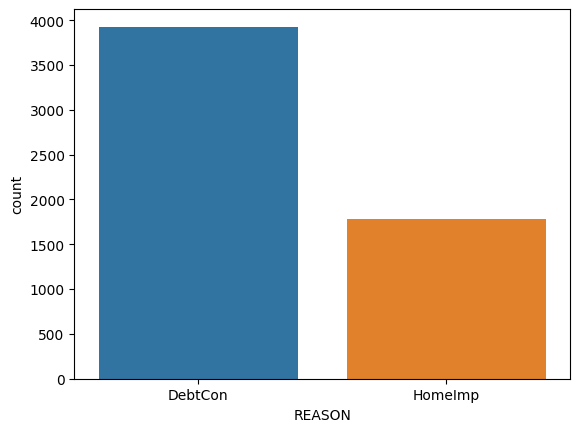

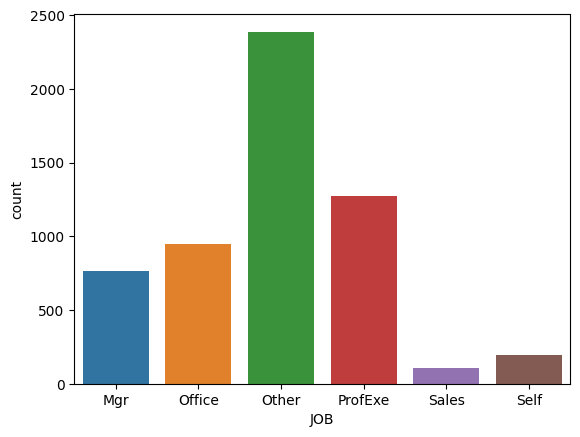

In [45]:
categories = df.select_dtypes(include=["category"])  # select the features to plot based on their data type
for feature in categories.columns:
    sns.countplot(x=feature, data=df)  
    plt.show()

### Univariate analysis of numeric variables
Let us now take a closer look at the numeric variables and their distribution by means of histograms. Creating a histogram is easily achieved using the `.hist()` function, which Pandas offers. Try it out by calling the function on your entire data frame. 

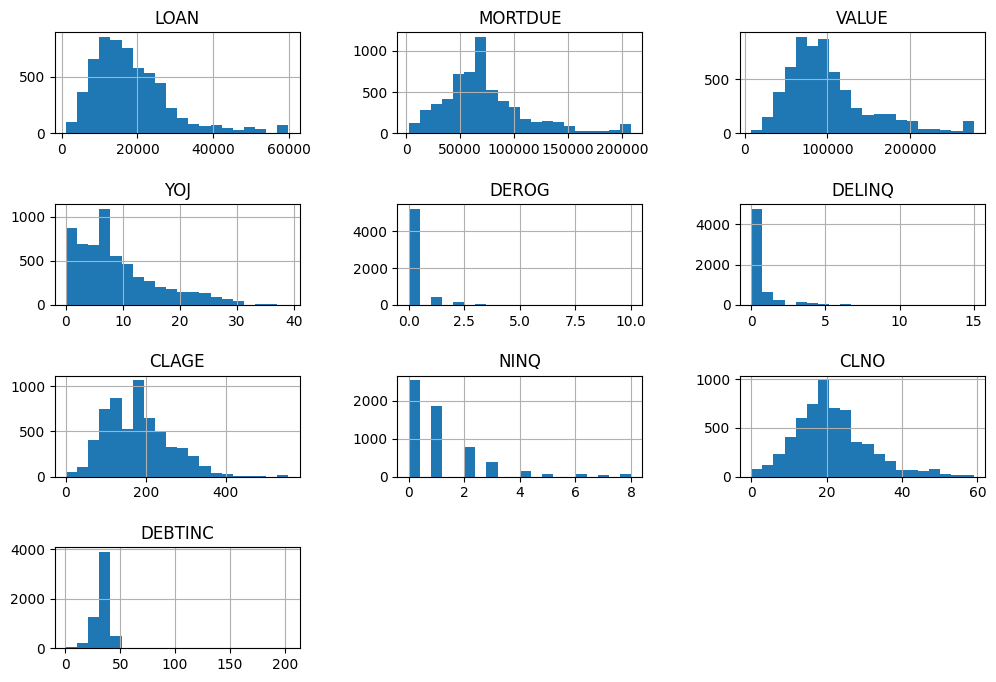

In [ ]:
# We create one histogram for each numeric variable and illustrate how to set the number of bins
df.select_dtypes(include=np.number).hist(bins=20, figsize=(12,8))
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

A nice feature of `.hist()` is that it creates a histogram for each numeric variable in the data frame in one go. This is particularly useful when working with high-dimensional data sets. However, the function offers only limited options to customize the plots. Therefore, we recommend using dedicated plotting libraries such as `Seaborn` or `Matplotlib` when you want to examine a single variable at a time. For example, to create a histogram of the feature 'LOAN' using the `Seaborn` library, you can use: 
```python
    sns.histplot(data=df, x='LOAN')
    plt.show()
```

In [49]:
# Create histogramms for a few more features. 
# Explore the arguments that the histplot function offers to customize the plots




Another crucial plot in data science is the boxplot. Creating a boxplot using Pandas is very easy:
```python
    df.boxplot(column='LOAN')
    plt.show()
```

Alternatively, we could again use *Seaborn* to create the boxplot:
```python
    sns.boxplot(x='LOAN', data=df)
    plt.show()
```

Decide for yourself which version you prefer. Both are fine. 

In [ ]:
# Try creating a boxplot for the feature 'VALUE' using either Pandas or Seaborn.


Next, we provide a more sophisticated demo in which we create histograms for all numerical features in the data frame using a loop. Note how we again use `.select_dtypes()` to identify the numerical features. Also, we introduce the `.subplots()` function from Matplotlib to create a grid of plots. 

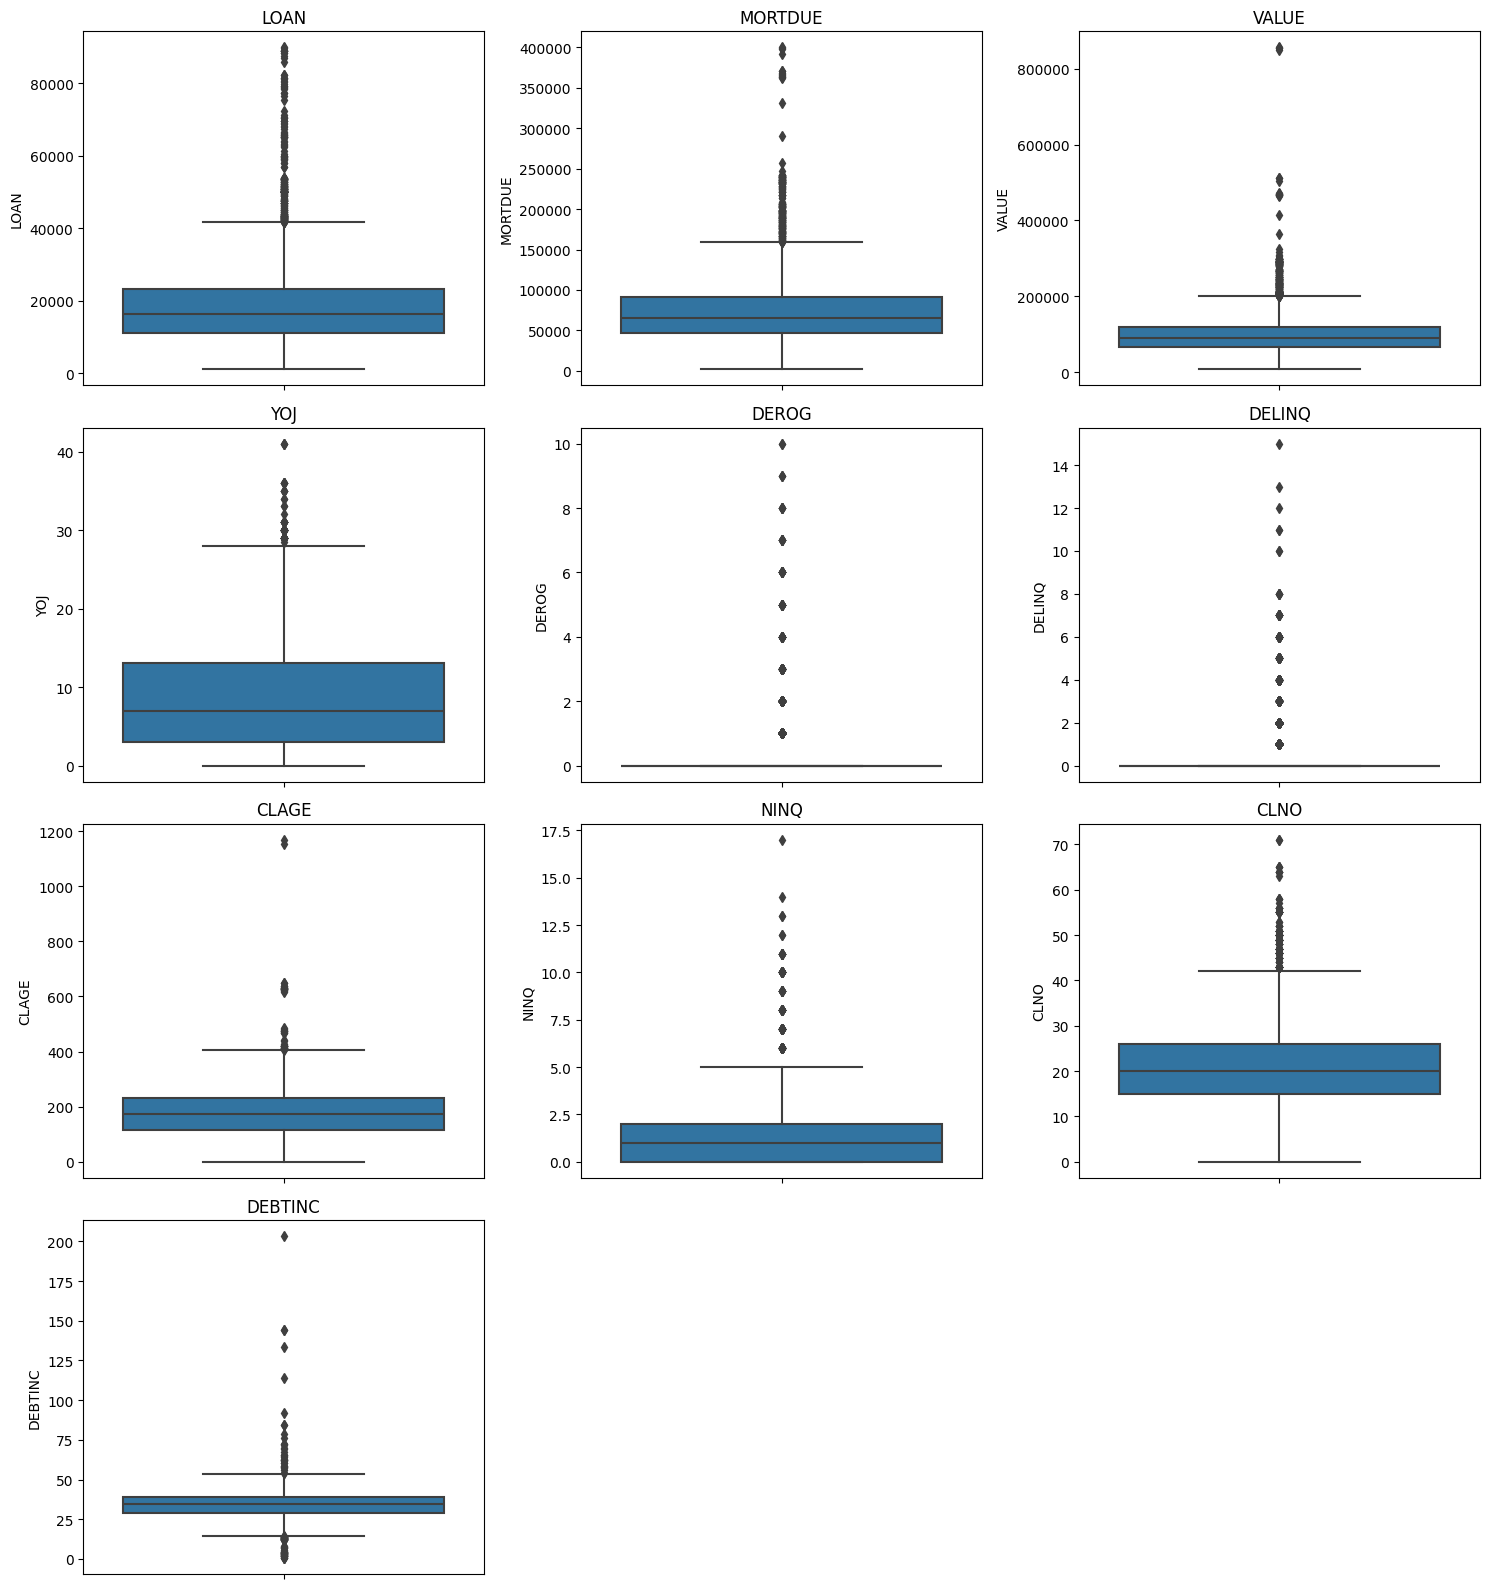

In [50]:
# Select only numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Determine the size of the grid of plots (e.g., 3 columns)
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

# subplots function in action: here we define the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten axes for easy indexing of individual plots
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(col)

# Turn off unused axes if any
for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Multivariate analysis of numeric variables

After gaining more knowledge about the variables individually, it is important to examine their relationships more closely. In data science, this is a good way of identifying redundant information as well as variable interactions. 
Next, we will plot a heatmap. It shows the correlation for all numeric variables. Highly correlated variables are redundant as they convey the same pieces of information.

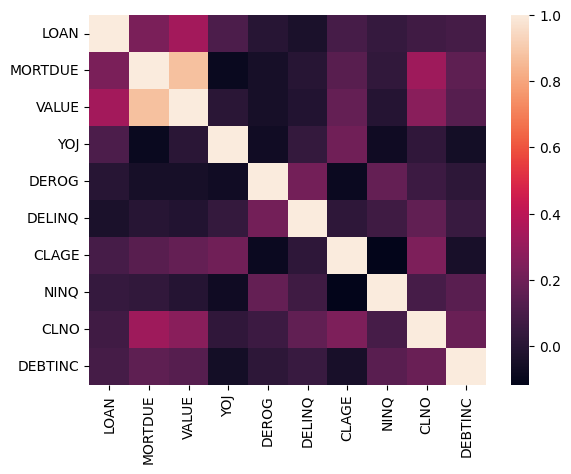

In [59]:
corr= df.select_dtypes(include=np.number).corr()
sns.heatmap(corr)
plt.show()

### Multivariate analysis of categorical variables

Categories and the binary target in particular are also useful to examine sub-groups. For example, we could calculate the mean of a/all numeric variables for good and bad borrowers. Enter `.groupby()`:

In [54]:
df.groupby("BAD").mean(numeric_only=True)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
False,19028.107422,74829.250000,102595.921875,9.154941,0.134217,0.245133,187.002350,1.032749,21.317036,33.253128
True,16922.119141,69460.453125,98172.851562,8.027802,0.707804,1.229185,150.190186,1.782765,21.211267,39.387646


Another standard operation when exploring categorical variables is to check cross-tabulations. Considering, for example, the variables `Reason`and `Job`, we can create a cross-tab as follows:

In [ ]:
pd.crosstab(df.REASON, df.JOB)

JOB,Mgr,Office,Other,ProfExe,Sales,Self
REASON,,,,,,
DebtCon,593,647,1894,871,97,78
HomeImp,174,301,773,405,12,115


A cross-tab can be particularly informative when it includes the target variable. This way, we can spot whether certain category levels of the other (independent) variable are especially prominent with good or bad borrowers. In this use case, we would also want to switch from showing counts (as above) to showing relative frequencies. We achieve this by augmenting our call to `crosstab()` with the argument `normalize='index'`. Have a look into the [documentation of the function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to understand why we select the option `'index'` for the function argument.

In [ ]:
job = pd.crosstab(df.JOB, df.BAD, normalize='index')
job

BAD,False,True
JOB,,
Mgr,0.766623,0.233377
Office,0.868143,0.131857
Other,0.783652,0.216348
ProfExe,0.833856,0.166144
Sales,0.651376,0.348624
Self,0.699482,0.300518


Once again, we can also report the same information in a graphical way. A common way to display categorical variables is the stacked count plot. Let us analyze the variables `REASON` and `JOB` and how they are linked to the target variable.

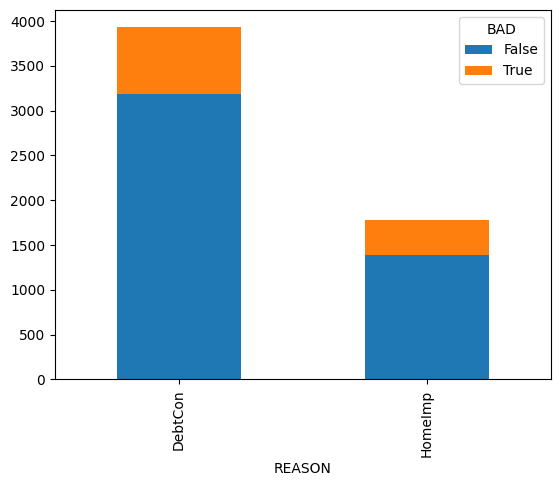

In [69]:
reason = df.groupby(['BAD', 'REASON'], observed=True).size().reset_index().pivot(columns='BAD', index='REASON', values=0)
                                                                       
reason.plot(kind='bar', stacked=True)

plt.show()

### Interactions between numeric and categorical variables 
Next, we can have a look at the distribution of our categories across the numerical variables. Violin plots are a great way to do so. The *seaborn* library makes creating these plots very easy. Below, we illustrate two options.

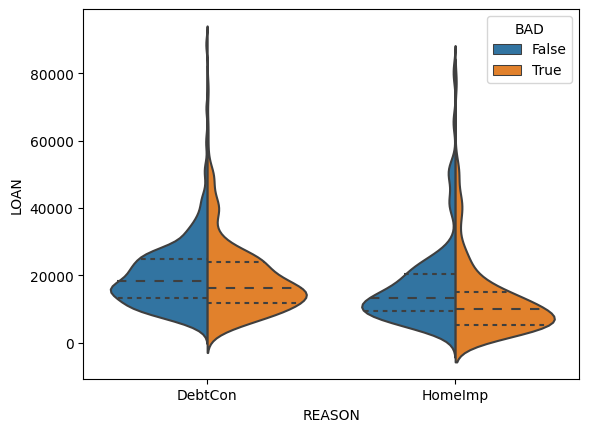

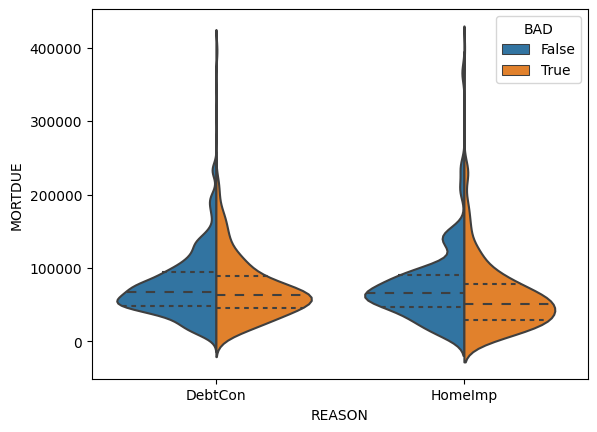

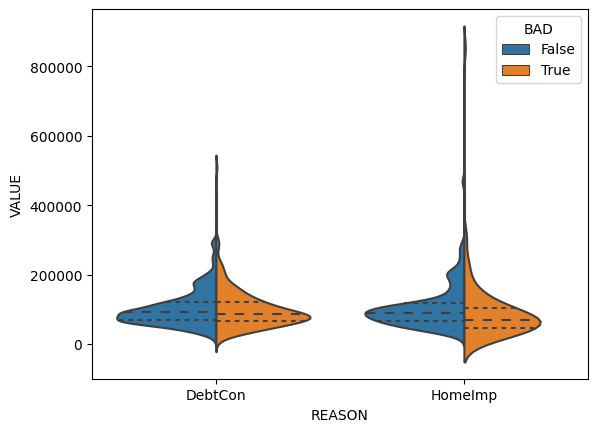

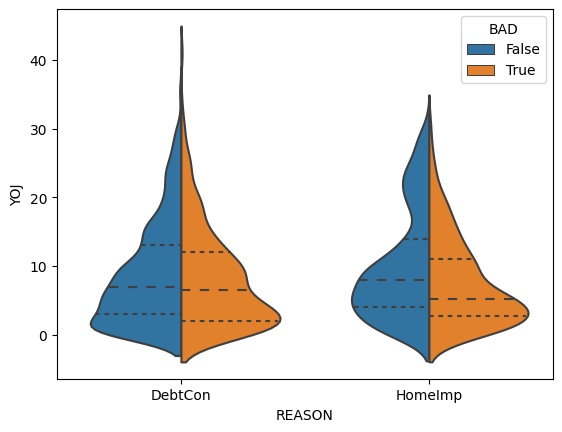

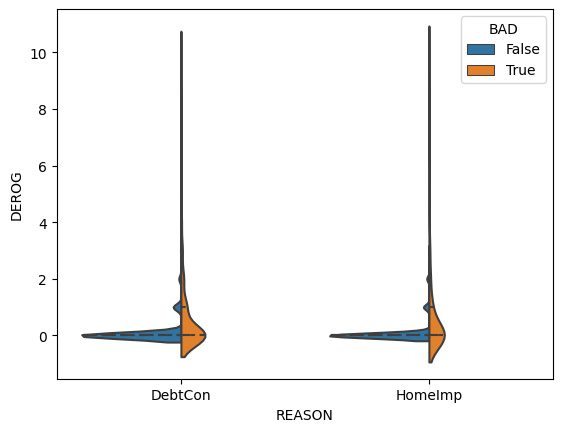

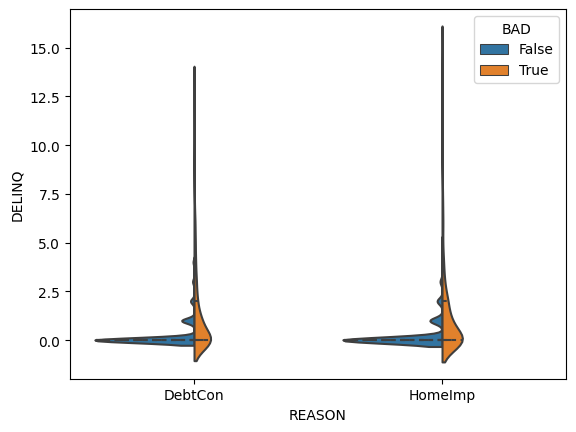

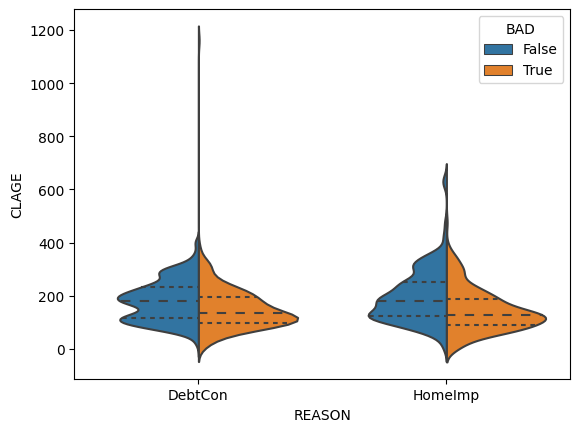

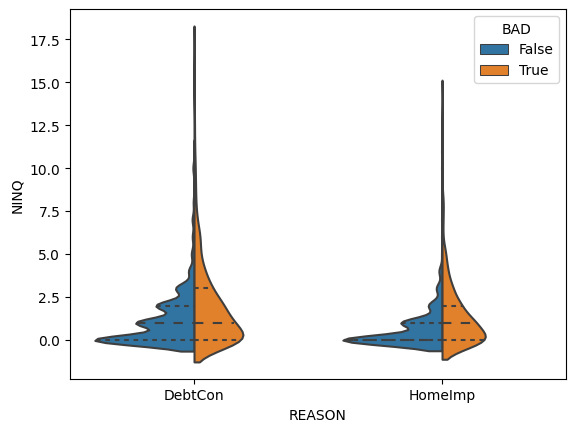

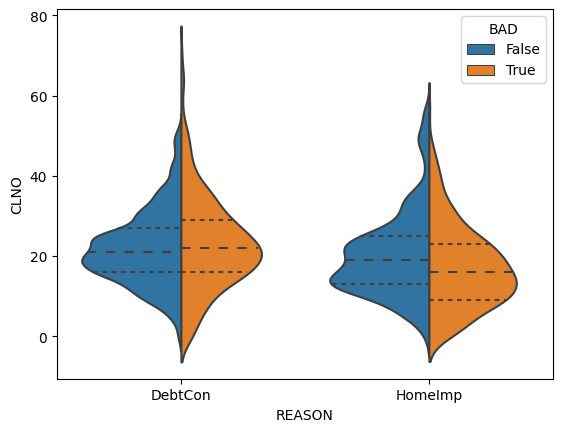

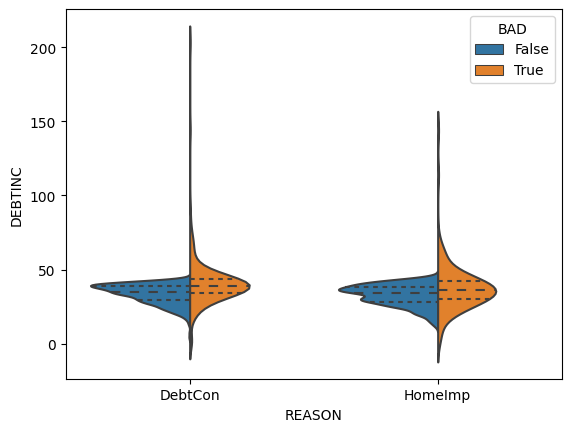

In [67]:
# We use the category 'REASON' and create one plot for each numeric variable
for col  in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.violinplot(x='REASON', y=col, hue='BAD',
                   split=True, inner="quart",
                   data= df)
plt.show()


Let's repeat this for the variable 'JOB' but using a different approach. Again, the insighty that you can derive from the visualizations should be similar. Simply decide which version you prefer.

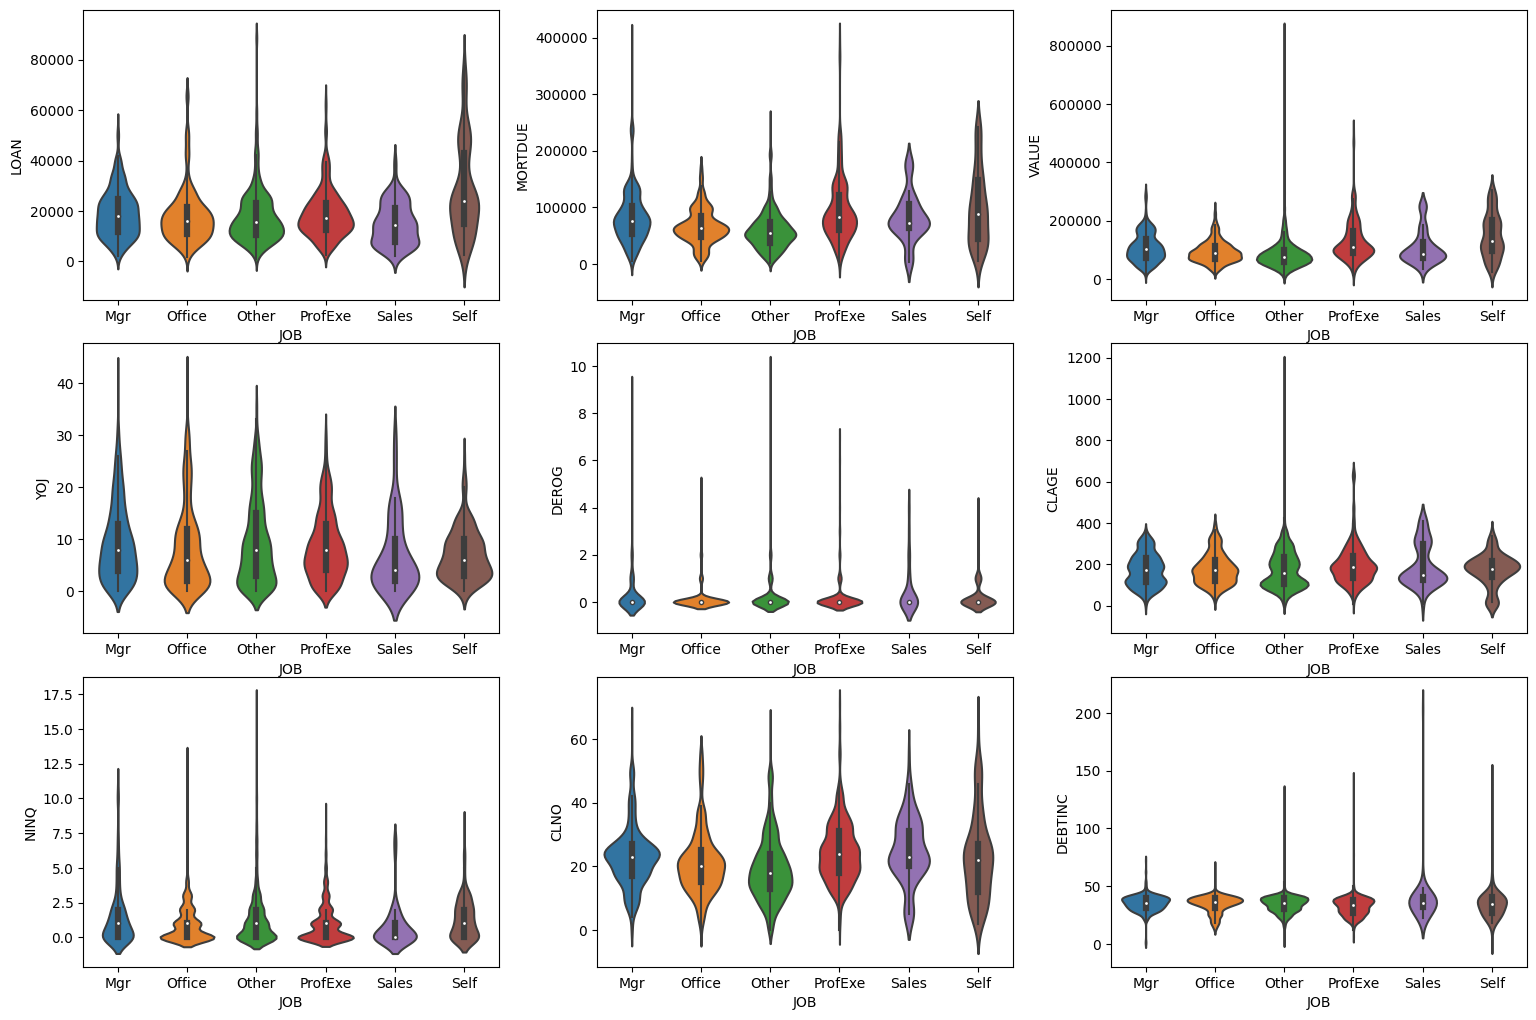

In [68]:
# Repeat for category JOB
fig, axs = plt.subplots(3,3, figsize=(15, 10))
plt.tight_layout(pad=0.5, w_pad=4, h_pad=1.0)  
x = df.JOB

sns.violinplot(x=x, y="LOAN",  data=df,ax=axs[0,0])
sns.violinplot(x=x, y="MORTDUE", data=df,ax=axs[0,1])
sns.violinplot(x=x, y="VALUE", data=df,ax=axs[0,2])
sns.violinplot(x=x, y="YOJ", data=df,ax=axs[1,0])
sns.violinplot(x=x, y="DEROG", data=df,ax=axs[1,1])
sns.violinplot(x=x, y="CLAGE", data=df,ax=axs[1,2])
sns.violinplot(x=x, y="NINQ", data=df,ax=axs[2,0])
sns.violinplot(x=x, y="CLNO", data=df,ax=axs[2,1])
sns.violinplot(x=x, y="DEBTINC", data=df,ax=axs[2,2]);

# Data preparation
Data preparation is a mega-topic. It will accompany us throughout the whole course. I this part, we focus on some typical issues in our data and demonstrate how to perform standard data prep tasks using `Pandas`. 

## Missing values
You might have already noticed that our data contains many missing values. This is common when working with real data. Likewise, handling missing values is a standard task in data preparation. `Pandas` provides the function `.isna()` as entry point to the corresponding functionality and helps with identifying the relevant cases.

*Note*: `Pandas` also supports an equivalent function called `.isnull()`. 

In [70]:
# Boolean mask of same size as the data frame to access missing values via indexing
missing_mask = df.isna()

print(f'Dimension of the mask: {missing_mask.shape}')
print(f'Dimension of the data frame: {df.shape}')

missing_mask


Dimension of the mask: (5960, 13)
Dimension of the data frame: (5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


We can now count the number of missing values per row or per column or in total.

In [71]:
# missing values per row
miss_per_row = missing_mask.sum(axis=1)
print('Missing values per row:\n', miss_per_row)

# missing values per column
miss_per_col = missing_mask.sum(axis=0)
print('Missing values per column:\n', miss_per_col )

# count the total number of missing values
n_total_missing = missing_mask.sum().sum()
print(f'Total number of missing values: {n_total_missing}')

Missing values per row:
 0        1
1        1
2        1
3       11
4        1
        ..
5955     0
5956     0
5957     0
5958     0
5959     0
Length: 5960, dtype: int64
Missing values per column:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64
Total number of missing values: 5271


It can be useful to visualize the *missingness* in a data set by means of a heatmap. Note how the below example gives you a good intuition of how and where the data set is affected by missing values. 

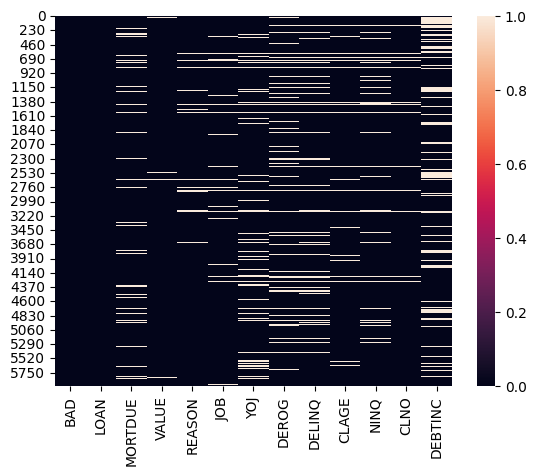

In [72]:
sns.heatmap(df.isna())  # quick visualization of the missing values in our data set
plt.show()

### Categorical features
Let's start with the two categorical features. The heatmap suggests that `REASON` exhibits more missing values than `JOB`. We will treat them differently for the sake of illustration. Now that we start altering our data frame more seriously, it is a good idea to make a copy of the data so that we can easily go back to a previous state.

In [73]:
# copy data
df_orig = df.copy()

#### Adding a new category level
One way to treat missing values in a categorical feature is to introduce a new category level "IsMissing". We will demonstrate this approach for the feature *REASON*. 
<br>One feature of the category data type in Pandas is that category levels are managed. We cannot add levels directly. Thus, before assigning the missing values our new category level *IsMissing*, we first need to introduce this level. We basically tell our data frame that *IsMissing* is another suitable entry for *REASON* next to the levels that already exist in the data frame. 

In [74]:
# Variable REASON: we treat missing values as a new category level.
# First we need to add a new level
df.REASON = df.REASON.cat.add_categories(['IsMissing'])

# Now we can do the replacement
df.REASON[df.REASON.isnull() ] = "IsMissing"
df.REASON.head()

0      HomeImp
1      HomeImp
2      HomeImp
3    IsMissing
4      HomeImp
Name: REASON, dtype: category
Categories (3, object): ['DebtCon', 'HomeImp', 'IsMissing']

In [75]:
df.REASON.isna().sum()  # verify that no more missing values exist

0

#### Mode replacement
For the feature *JOB*, which is multinomial, we replace missing values with the mode. Please note that this is a crude way to handle missing values. I'm not endorsing it! But you should have at least seen a demo. Here it is. 

In [76]:
# Determine the mode
mode_of_job = df.JOB.mode()
print(mode_of_job)

0    Other
Name: JOB, dtype: category
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']


In [77]:
# replace missing values with the mode
df.JOB[df.JOB.isnull() ] = df.JOB.mode()[0]  # the index [0] is necessary as the result of calling mode() is a Pandas Series
# verify that no more missing values exist
df.JOB.head()

0     Other
1     Other
2     Other
3     Other
4    Office
Name: JOB, dtype: category
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']

In [78]:
# Verify more seriously that missing value replacement was successful
if df.REASON.isnull().any() == False and df.JOB.isnull().any() == False:
    print('well done!')
else:
    print('ups')

well done!


### Numerical features
We have a lot of numerical features. To keep things simple, we simply replace all missing values with the median. Again, this is  a crude approach that should be applied with care; if at all. 

Regarding the implementation of media replacement, we could write a loop that treats every feature one-by-one:
```python
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
```
However, Pandas provides a more elegant way to achieve the same result without writing an explicit loop:
```python
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
``` 

A more *data science* way to impute missing values is to the `SimpleImputer`class from *sklearn* 
```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])
```

Try out any of the above options to impute missing values in the numerical features. Then run the following code to verify that all missing values have been handled.


In [ ]:
# Impute missing values in numerical columns using median replacement


In [ ]:
# Verify there are no more missing values in the data
n_total_missing = df.isna().sum().sum()
if  n_total_missing == 0:
    print('Well done, no more missing values!')
else:
    print(f'Ups! There are still {n_total_missing} missing values.')


Well done, no more missing values!


## Outliers
Given that our data includes some outliers, we apply our standard outlier truncation mechanism. This time, we focus on extreme outliers (i.e., 3 times inter-quartile-range above/below the 75th/25th percentile). Further, we exclude two features from outlier treatment: `DEROG` and `DELINQ`. The reason is that standard outlier truncation would completely destroy these features due to their very skewed distribution. 

We also exclude the `DEBTINC` feature from outlier treatment. This is for didactic reasons. The feature is more informative without standard outlier treatment.  

In [ ]:
# Helper function to handle outliers
def truncate_outliers(df, factor=1.5):
    excluded_columns = ['DEROG', 'DELINQ', 'DEBTINC']
    ix_num  = [c for c in df.select_dtypes(include=np.number).columns if c not in excluded_columns]   
    for col in ix_num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function to the data and inspect the results
df = truncate_outliers(df, factor=3)
df.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18459.177852,72326.504060,100527.982473,8.755159,0.224329,0.405705,179.014539,1.148322,21.235906,34.000651
std,10500.744330,39437.327495,50639.354946,7.255089,0.798458,1.079256,80.768529,1.538720,9.901447,7.644528
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,59900.000000,208384.000000,276550.500000,39.000000,10.000000,15.000000,556.457943,8.000000,59.000000,203.312149


Now re-create the boxplots to verify that outliers have been handled. You can copy and paste the code from above.

In [ ]:
# Matrix of boxplots to inspect treatment of outliers

## Discretization of Numeric Variables

As seen in the boxplots above, we are facing some issues with the distribution of `DEROG` and `DELINQ`. Given their distribution, it seems appropriate to discretize these variables.  Discretization is the process of converting a numeric variable into a discrete variable, i.e., a category. Since both, `DEROG` and `DELINQ` display a large number of zeros, we could, for example, consider one category level *isZero* and another *IsGreaterThenZero*. This would give a binary variable. We can also introduce more category levels to obtain a fine-grained categorical representation of the original numbers. Normally, the function `qcut()` is a good choice to discretize a variable based on quantiles. We cannot demonstrate this with `DEROG` and `DELINQ` since their distributions do not warrant using quantiles as split points. Let's first inspect the set of distinct values in these two features.

In [81]:
df.DELINQ.value_counts()

DELINQ
0.0     4759
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: count, dtype: int64

In [82]:
df.DEROG.value_counts()

DEROG
0.0     5235
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: count, dtype: int64

How you proceed from here is based on judgment. We will exemplify two different techniques that could be considered in the focal case. For one feature, we will create a dummy, indicating whether or not the value of the variable is 0. For the other feature, we will group into three categories. As "DELINQ" shows fewer observations for the value 0, we will use this variable to divide into three groups: 0, 1 & >1. If you wish, this is a manual, or expert-based version of discretization in which we pick the boundaries of the buckets manually instead of picking them by looking at quantiles.  

In [83]:
df['DELINQcat'] = '1+' #set default value to +1 for new variable 
df.loc[(df['DELINQ'] == 1), 'DELINQcat'] = '1' # change this value to 1, if value of DELINQ is 1
df.loc[(df['DELINQ'] == 0), 'DELINQcat'] = '0'
df['DELINQcat'] = df['DELINQcat'].astype('category')  # convert to categorical
df.DELINQcat.value_counts()

DELINQcat
0     4759
1      654
1+     547
Name: count, dtype: int64

We will proceed similarly with the variable "DEROG". We will create a dummy variable where every observation has the value 1 (true) if their value for the "DEROG" variable was 0. Every other value will be assigned the value 0 (false).

In [84]:
df['DEROGzero'] = 0 #set default to 0
df.loc[(df['DEROG'] == 0), 'DEROGzero'] = 1 #change to 1 if value of "DEROG" is 0 
df['DEROGzero'] = df['DEROGzero'].astype('bool')
df.DEROGzero.value_counts()

DEROGzero
True     5235
False     725
Name: count, dtype: int64

We are not done with our EDA workflow. However, we will not make any more changes to the data. Therefore, it is a good time to save a copy of the prepared data so that we can re-use it in subsequent coding sessions.

In [ ]:
# Store the data in the present, pre-processed format
df.to_csv('./hmeq_prepared.csv', index=False)

# Summary of useful Pandas functions

Many useful tricks with `Pandas` (here `df` is a pandas DataFrame and `col` is one of its columns):

| Goal | Possible Code |
| --- | --- |
| Get df column (column name must have no spaces) | `df.col` |
| Get df column | `df["col"]` |
| Example condition: only select rows where `col1 > 1` | `df["col"] > 1` |
| Use index names to select rows and columns | `df.loc[row_list, col_list]` |
| Use index numbers to select rows and columns | `df.iloc[row_list, col_list]` |
| Get df column based on a condition | `df.loc[condition, ['col2','col3',...]]`|
| Group df by values of `col` | `df.groupby("col")` |
| Perform function on `col2` for each group of `col1` | `df.groupby("col1")["col2"].fun()` |
| Find value counts of each value in `col` | `df.groupby(['col']).size()`| 
| Get column mean and ignore null values | `df["col"].mean(skipna=True)` |
| Get column mode | `df["col"].mode()` |
| Get column median | `df["col"].median()` |
| Get rows of the 95th quantile of `col` | `df["col"].quantile(q=0.95)` |
| Filter `df` with a boolean condition | `df.query(condition)` |
| Create tally of `col2` by values of `col1` | `pd.crosstab(df['col1'], df['col2']`) |
| Pivot rows and columns | `df.pivot(index='col1', columns='col2', values='col3')` | 
| Sort values by `col` and save `df` in this order | `df.sort_values(by='col', inplace=True)` |
| Apply function to each column of `df` | `df.apply(fun)` |
| Save `df` as CSV in working directory | `df.to_csv('./file_name.csv', index=False)` |
| Count the number of times each value occurs | `df['col'].value_counts()` |
| Change column's data type | `df['col'] = df['col'].astype('type')` |
| Create boolean matrix of `df` where `True` indicates null value | `df.isnull()` | 
| Create boolean matrix of `df` where `True` indicates null value | `df.isna()` | 
| Create copy of df | `df_copy = df.copy()` |
| Add new category to categorical variable | `df.col.cat.add_categories(['New C'], inplace=True)` |
| Replace null values with `"IsMissing"` | `df.col[df.col.isnull()] = "IsMissing"` |
| Fill missing values with median and save `df` | `df['col'].fillna(median_value, inplace=True)` |
| Calculate time at execution (must import `time` library) | `time.time()` |

# Exercises


## 1. Dependency of loan amount and credit risk
Examine the dependency between the loan amount (i.e., feature `LOAN`) and the default risk. You find  information on the latter in the column `df["BAD"]`. A value of 1 indicates that a borrower is a defaulter (i.e., bad risk). Specifically:
1. Calculate the average of the feature `LOAN`
2. Calculate the average `LOAN` amount separately for bad and good risk using logical indexing. 
3. Interpret the results of your analysis. Is there a dependency between `LOAN` and default risk?
4. Re-calculate the average `LOAN` amount for good and bad risks. This time, make use of the function `group_by`, which exists for data frames.  
5. Extend the previous task by computing the group-wise median for all numerical features in the data frame


**Extension:** a nice extension of subtasks 1 to 3 would be to secure your interpretation with a statistical hypothesis test. Perhaps you know a suitable test. If not, run a web search for, e.g., *“statistical test for difference in means python”*.

In [35]:
# Solutions to the exercises


## 2. Scaling numerical 
Another common data preparation task is scaling numerical features. The goal is to ensure that all features have the same scale. This is important for many machine learning algorithms. The lecture introduced two common scaling methods: min-max scaling and z-score scaling.
The `sklearn` library provides implementations of both approaches in the classes `MinMaxScaler` and `StandardScaler`, which are part of the module `preprocessing`. Expericence their functionality to solving the following exercises.

1. Import the class `MinMaxScaler` and `StandardScaler` from the module `preprocessing` in the library `sklearn`.
2. Familiarize yourself with the functioning of the `StandardScaler` using its documentation and other sources (e.g., web search). 
3. Test the `StandardScaler` by applying it to the numerical features `LOAN`. Afterwards, the scaled feature should have a mean of 0 and a standard deviation of 1. Write a few lines of code to verify this.
4. The use of the `MinMaxScaler` is similar to the `StandardScaler`. Apply the `MinMaxScaler` to all other numerical features in the data set. More specifically, 
- Create a new data frame that contains only the numerical features.
- Remove the feature `LOAN` from that data frame; as we already scaled it in task 3.
- Apply the `MinMaxScaler` to the new data frame.
- Write a few lines of code to verify that the scaling was successful. To that end, recall what the 'MinMaxScaler' does.
- Combine the scaled features with the feature `LOAN` and the categorical features in a new `DataFrame`.


In [37]:
# Solutions 

## 3. Discretizing numerical features
Discretizing numerical features is another common data preparation task. The goal is to convert continuous numerical features into discrete bins or categories. This can be useful for certain types of analysis and modeling. The `pandas` library provides the `cut` and `qcut` functions for this purpose.

1. Familiarize yourself with the `cut` and `qcut` functions in the `pandas` library using their documentation and other sources (e.g., web search).
2. Use the `cut` function to discretize the `LOAN` feature into 5 equal-width bins. Assign meaningful labels to each bin (e.g., 'Very Low', 'Low', 'Medium', 'High', 'Very High').
3. Verify the binning by displaying the first few rows of the data frame and checking the `LOAN` feature.
4. Use the `qcut` function to discretize the `MORTDUE` feature into 4 quantile-based bins. Assign meaningful labels to each bin (e.g., 'Q1', 'Q2', 'Q3', 'Q4').
5. Verify the binning by displaying the first few rows of the data frame and checking the `MORTDUE` feature.
6. Create a new data frame that includes the discretized `LOAN` and `MORTDUE` features along with the other original features.
7. Write a custom function that takes a data frame and a list of numerical features as input and returns a new data frame with all specified features discretized into a given number of bins using the `cut` function. Test your function on the numerical features in the data frame.

In [38]:
# Solutions 